Preprocessing

In [153]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [154]:
# Reading files
data_client = pd.read_csv('data_files/client.csv')
data_invoice = pd.read_csv('data_files/invoice.csv')

Looking Through data / data cleaning

In [155]:
# Looking at header and data
print(data_client.head())

print(data_client.count())


   region        date  dis    id  catg  target
0     101  31/12/1994   60     0    11       0
1     107   29/5/2002   69     1    11       0
2     301   13/3/1986   62    10    11       0
3     105   11/7/1996   69   100    11       0
4     303  14/10/2014   62  1000    11       0
region    21652
date      21652
dis       21652
id        21652
catg      21652
target    21652
dtype: int64


In [156]:
print(data_invoice.head())

print(data_invoice.count())

   id        date  tarif_type  counter_statue  reading_remarque  \
0   0   24/3/2014          11               0                 8   
1   0   29/3/2013          11               0                 6   
2   0   23/3/2015          11               0                 8   
3   0   13/7/2015          11               0                 8   
4   0  17/11/2016          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  \
0                     0              4         ELEC                    1   
1                     0              4         ELEC                    1   
2                     0              4         ELEC                    1   
3                     0              4         ELEC                    1   
4                     0             12         ELEC                    1   

   consommation_level_1  consommation_level_2  consommation_level_3  
0                    82                     0                     0  


In [157]:
# Check for missing data in client
data_client.isna().any()

region    False
date      False
dis       False
id        False
catg      False
target    False
dtype: bool

In [158]:
# Check for missing data in invoice
data_invoice.isna().any()

id                      False
date                    False
tarif_type              False
counter_statue          False
reading_remarque        False
consommation_level_4    False
months_number           False
counter_type            False
counter_coefficient     False
consommation_level_1    False
consommation_level_2    False
consommation_level_3    False
dtype: bool

There are no missing values in the dataset

In [159]:
# Drop duplicates
data_client.drop_duplicates(inplace=True)
data_invoice.drop_duplicates(inplace=True)


There are no duplicate values in the dataset as well

In [160]:
print(data_client.nunique())
print(data_invoice.nunique())
print(data_client.dis.unique())
print(data_client.catg.unique())

region       24
date       5984
dis           4
id        21652
catg          3
target        2
dtype: int64
id                      21652
date                     5538
tarif_type                 12
counter_statue              6
reading_remarque            4
consommation_level_4     4773
months_number             152
counter_type                2
counter_coefficient         4
consommation_level_1     3795
consommation_level_2     5348
consommation_level_3     1296
dtype: int64
[60 69 62 63]
[11 12 51]


Data Visualisation

<BarContainer object of 2 artists>

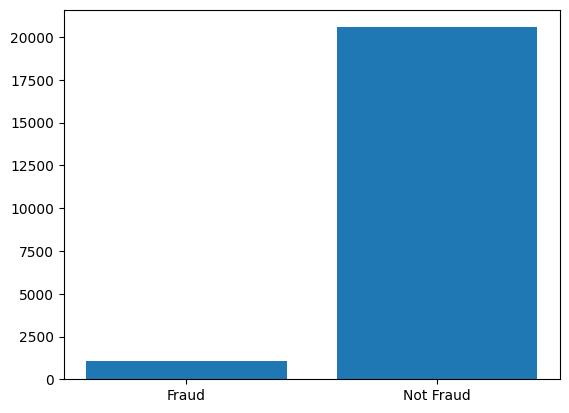

In [161]:
# Visualise dependent variable
fraud_c = data_client[data_client['target'] == 1]
not_fraud_c = data_client[data_client['target'] == 0]


plt.bar(['Fraud', 'Not Fraud'], [len(fraud_c), len(not_fraud_c)])

Significantly larger number of clients are not fraudulent compare to fraudulent clients, showcasing an imbalance dataset.

In [162]:
# Getting the counts of each client category
fraud_catg_count = fraud_c['catg'].value_counts()
client_catg_count = data_client['catg'].value_counts()
not_fraud_catg_count = not_fraud_c['catg'].value_counts()

# Calculating the percentage of fraud and non-fraud data in each catg as a percentage of client data
percentage_of_fraud = (fraud_catg_count / client_catg_count) * 100
percentage_not_fraud = (not_fraud_catg_count / client_catg_count) * 100

# Fitting data into dataframe
comparison = pd.DataFrame({
    'fraud_catg_count': fraud_catg_count,
    'not_fraud_catg_count': not_fraud_catg_count,
    'client__catg_count': client_catg_count,
    'percentage_of_fraud': percentage_of_fraud,
    'percentage_not_fraud': percentage_not_fraud
})

# Viewing data
print(comparison)

      fraud_catg_count  not_fraud_catg_count  client__catg_count  \
catg                                                               
11                1021                 20051               21072   
12                  19                   369                 388   
51                  36                   156                 192   

      percentage_of_fraud  percentage_not_fraud  
catg                                             
11               4.845292             95.154708  
12               4.896907             95.103093  
51              18.750000             81.250000  


It can be seen that even though there are a lot less catg 51 clients, there odds of a client being fraudulant are significantly higher than that of clients in other catg, at almost 5 times more likely. This can be seen in the bar plot below as well.

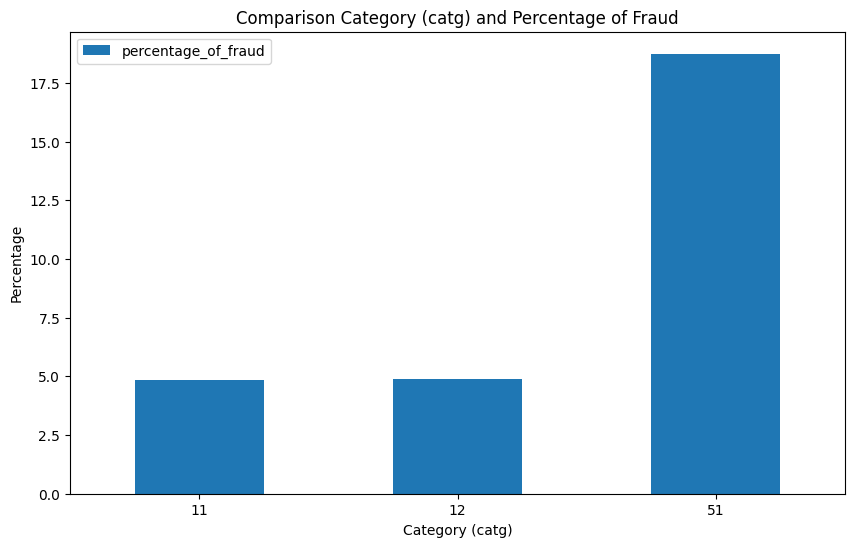

In [163]:
# Creating a bar plot for the percentage
comparison[['percentage_of_fraud']].plot(kind='bar', figsize=(10, 6))

# Setting title and labels
plt.title('Comparison Category (catg) and Percentage of Fraud')
plt.xlabel('Category (catg)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Displaying plot
plt.show()

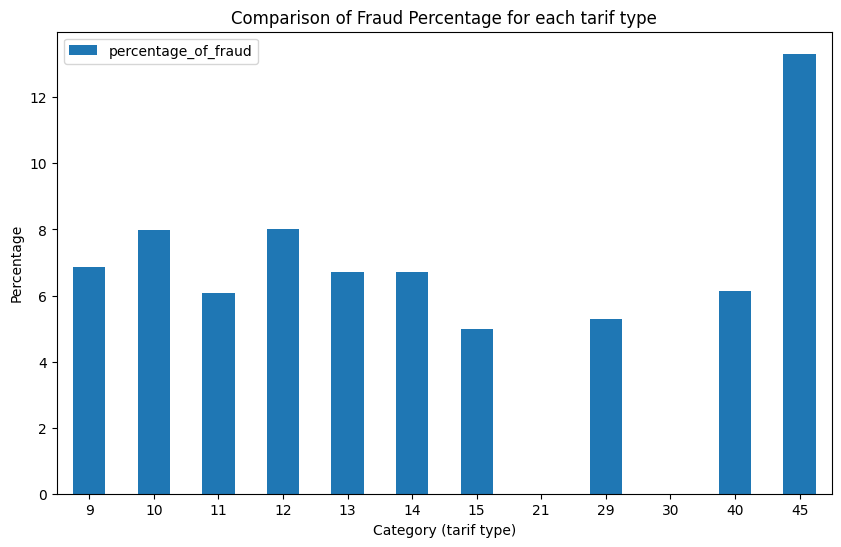

In [164]:
# Splitting invoice data into fraud and not fraud
fraud_i = data_invoice[data_invoice['id'].isin(fraud_c['id'])]
not_fraud_i = data_invoice[data_invoice['id'].isin(not_fraud_c['id'])]

# Getting the counts of each tarif type
fraud_tarif = fraud_i['tarif_type'].value_counts()
invoice_tarif = data_invoice['tarif_type'].value_counts()

# Calculating the percentage of fraud data for each tarif type as a percentage of client data
percentage_of_fraud = (fraud_tarif / invoice_tarif) * 100

# Fitting data into dataframe
comparison = pd.DataFrame({
    'fraud_tarif': fraud_tarif,
    'invoice_tarif': invoice_tarif,
    'percentage_of_fraud': percentage_of_fraud
})

# Creating a bar plot for the percentage
comparison[['percentage_of_fraud']].plot(kind='bar', figsize=(10, 6))

# Setting title and labels
plt.title('Comparison of Fraud Percentage for each tarif type')
plt.xlabel('Category (tarif type)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Displaying plot
plt.show()

It can be seen that the tarif type does not really affect the probability of an invoice being from a fraudulant client, as the bar graph above is actually quite horizontal throughout, with the exception of tarif type 45 that is almost twice as likely. However this may not be significant in the whole scheme of things, so we will further investigate the other features.

In [165]:
# List of consumption level columns
consumption_cols = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']

# Calculate min, max, and average for the consumption columns
min_values_f = fraud_i[consumption_cols].min()
max_values_f = fraud_i[consumption_cols].max()
mean_values_f = fraud_i[consumption_cols].mean()

min_values_n = not_fraud_i[consumption_cols].min()
max_values_n = not_fraud_i[consumption_cols].max()
mean_values_n = not_fraud_i[consumption_cols].mean()

# Display the results
print("Minimum values: \nFraud" )
print(min_values_f)
print("Not Fraud")
print(min_values_n)

print("\nMaximum values: \nFraud")
print(max_values_f)
print("Not Fraud")
print(max_values_n)

print("\nAverage values: \nFraud")
print(mean_values_f)
print("Not Fraud")
print(mean_values_n)

Minimum values: 
Fraud
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
dtype: int64
Not Fraud
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
dtype: int64

Maximum values: 
Fraud
consommation_level_1     30080
consommation_level_2     25997
consommation_level_3      5345
consommation_level_4    116145
dtype: int64
Not Fraud
consommation_level_1     98889
consommation_level_2    819886
consommation_level_3     45360
consommation_level_4    343568
dtype: int64

Average values: 
Fraud
consommation_level_1    499.839774
consommation_level_2    160.204547
consommation_level_3     53.134335
consommation_level_4    127.809387
dtype: float64
Not Fraud
consommation_level_1    439.308751
consommation_level_2    117.865928
consommation_level_3     26.532487
consommation_level_4     60.160250
dtype: float64


It can be seen that the min consommation for all categories looked at above is 0. Thus, we will not be taking into account the min consommation levels. To further gain insights on the above data, we are using bar plots to visualise the differences for each value.

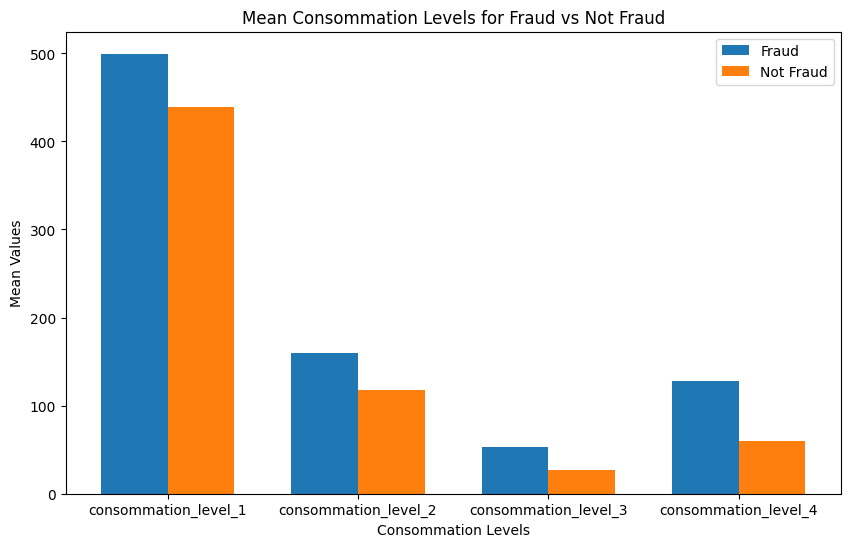

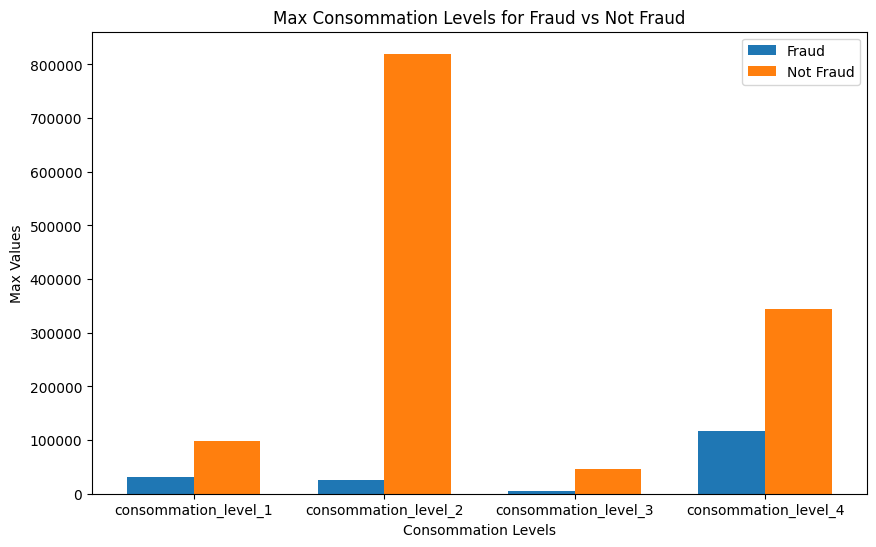

In [166]:
def plot_consommation_graphs(fraud_data, not_fraud_data, title):
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Get a range for the x-axis labels
    index = np.arange(len(consumption_cols))

    # Define the bar width
    bar_width = 0.35

    # Plot the fraud and not fraud means side by side
    bar1 = ax.bar(index, fraud_data, bar_width, label='Fraud')
    bar2 = ax.bar(index + bar_width, not_fraud_data, bar_width, label='Not Fraud')

    # Adding labels, title, and x-axis ticks
    ax.set_xlabel('Consommation Levels')
    ax.set_ylabel(f'{title} Values')
    ax.set_title(f'{title} Consommation Levels for Fraud vs Not Fraud')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(consumption_cols)
    ax.legend()

    # Displaying plot
    plt.show()

# Viewing graphs for mean and max consommation level
plot_consommation_graphs(mean_values_f, mean_values_n, 'Mean')
plot_consommation_graphs(max_values_f, max_values_n, 'Max')

It can be seen that the mean consommation level for fraud invoices are always higher than that of non-fraudulant invoices, yet the max consommation level for fraud is much less than that of not fraud at all consommation levels.

Feature Engineering

In [167]:
# Convert date column to datetime
data_client['date'] = pd.to_datetime(data_client['date'])

# Extract year, month, and tenure
data_client['year_joined'] = data_client['date'].dt.year
data_client['month_joined'] = data_client['date'].dt.month
data_client['tenure'] = (pd.to_datetime('today') - data_client['date']).dt.days

# Convert to datetime and extract features
data_invoice['date'] = pd.to_datetime(data_invoice['date'])
data_invoice['year'] = data_invoice['date'].dt.year
data_invoice['month'] = data_invoice['date'].dt.month
data_invoice['days_since_last_invoice'] = (pd.to_datetime('today') - data_invoice['date']).dt.days

print(data_client.head())
print(data_invoice.head())

/var/folders/t2/_hypj1cj7gj6b3j_nd6zhsgr0000gn/T/ipykernel_98758/1726339021.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_client['date'] = pd.to_datetime(data_client['date'])
/var/folders/t2/_hypj1cj7gj6b3j_nd6zhsgr0000gn/T/ipykernel_98758/1726339021.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_invoice['date'] = pd.to_datetime(data_invoice['date'])


   region       date  dis    id  catg  target  year_joined  month_joined  \
0     101 1994-12-31   60     0    11       0         1994            12   
1     107 2002-05-29   69     1    11       0         2002             5   
2     301 1986-03-13   62    10    11       0         1986             3   
3     105 1996-07-11   69   100    11       0         1996             7   
4     303 2014-10-14   62  1000    11       0         2014            10   

   tenure  
0   10889  
1    8183  
2   14104  
3   10331  
4    3662  
   id       date  tarif_type  counter_statue  reading_remarque  \
0   0 2014-03-24          11               0                 8   
1   0 2013-03-29          11               0                 6   
2   0 2015-03-23          11               0                 8   
3   0 2015-07-13          11               0                 8   
4   0 2016-11-17          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  

Changing all string date data to date-time data types to be better used in the model. Additionally, extracting the months, years and days, so that it is easier to be used in the model.

In [168]:
# Standardising numeric variables
data_invoice[['counter_coefficient', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']] = StandardScaler().fit_transform(data_invoice[['counter_coefficient', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']])

print(data_invoice.head())

   id       date  tarif_type  counter_statue  reading_remarque  \
0   0 2014-03-24          11               0                 8   
1   0 2013-03-29          11               0                 6   
2   0 2015-03-23          11               0                 8   
3   0 2015-07-13          11               0                 8   
4   0 2016-11-17          11               0                 9   

   consommation_level_4  months_number counter_type  counter_coefficient  \
0             -0.052334              4         ELEC            -0.003262   
1             -0.052334              4         ELEC            -0.003262   
2             -0.052334              4         ELEC            -0.003262   
3             -0.052334              4         ELEC            -0.003262   
4             -0.052334             12         ELEC            -0.003262   

   consommation_level_1  consommation_level_2  consommation_level_3  year  \
0             -0.609700             -0.086277             -0.131753  

Standardised all numeric values to prepare to be used for logistic regression, or Kmeans